# Data Augmentation To Address Overfitting In Flower Classification CNN

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib

In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15822837396_96b392fda8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8853083579_dd1dfa3188.jpg'),
 PosixPath('datasets/flower_photos/roses/3045046293_57f6d52065_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15255964274_cf2ecdf702.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg'),
 PosixPath('datasets/flower_photos/roses/16334786972_1b3e71cab8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12202373204_34fb07205b.jp

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15822837396_96b392fda8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg')]

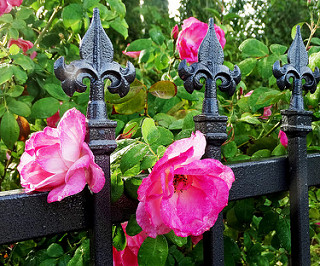

In [9]:
PIL.Image.open(str(roses[0]))

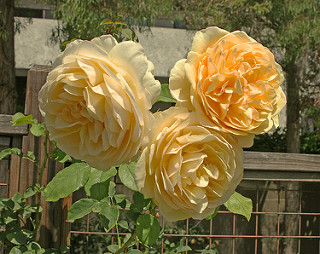

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
tulips = list(data_dir.glob('tulips/*'))

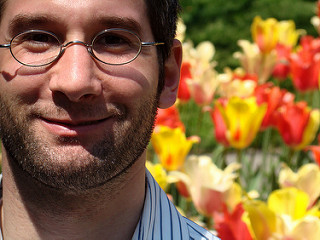

In [12]:
PIL.Image.open(str(tulips[0]))

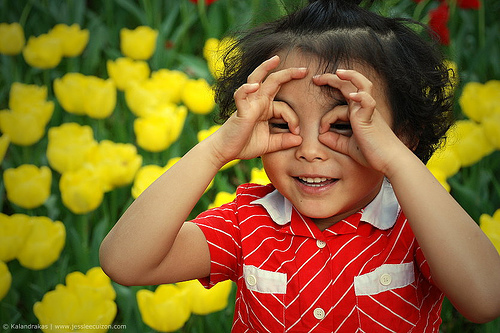

In [13]:
PIL.Image.open(str(tulips[30]))

In [14]:
dandelion = list(data_dir.glob('dandelion/*'))

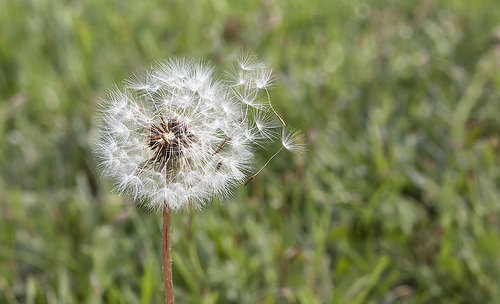

In [15]:
PIL.Image.open(str(dandelion[0]))

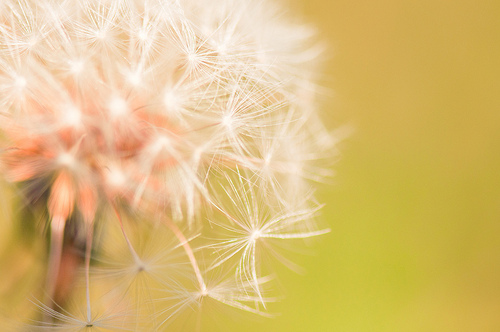

In [16]:
PIL.Image.open(str(dandelion[10]))

In [17]:
sunflowers = list(data_dir.glob('sunflowers/*'))

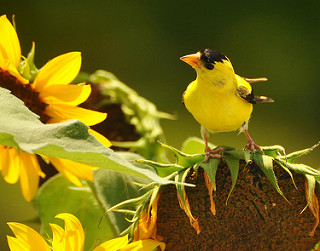

In [18]:
PIL.Image.open(str(sunflowers[0]))

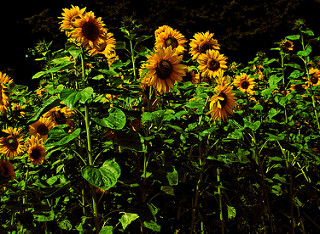

In [19]:
PIL.Image.open(str(sunflowers[1]))

In [20]:
daisy = list(data_dir.glob('daisy/*'))

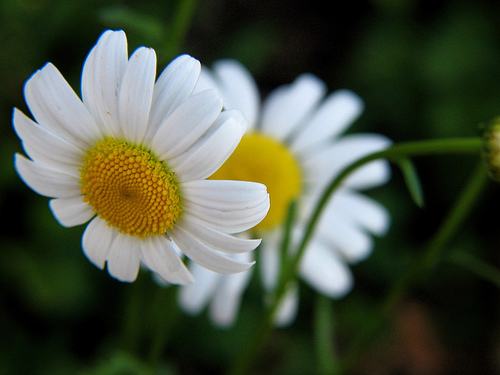

In [21]:
PIL.Image.open(str(daisy[0]))

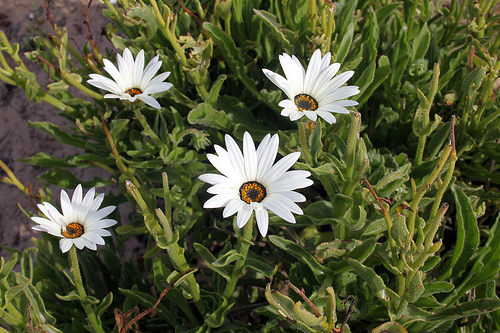

In [22]:
PIL.Image.open(str(daisy[10]))

In [23]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [24]:
flower_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [25]:
str(flower_images_dict['roses'][0])

'datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg'

In [26]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [27]:
img

array([[[164, 122, 223],
        [167, 131, 213],
        [158, 119, 217],
        ...,
        [175, 201, 188],
        [107, 166, 135],
        [110, 162, 122]],

       [[145, 102, 215],
        [168, 131, 223],
        [167, 132, 219],
        ...,
        [ 57, 115,  90],
        [106, 193, 157],
        [ 99, 169, 132]],

       [[117,  77, 208],
        [161, 124, 226],
        [165, 133, 210],
        ...,
        [ 89, 152, 120],
        [119, 199, 162],
        [ 95, 153, 118]],

       ...,

       [[  7,   2,  11],
        [  0,   4,   0],
        [ 21,   2,  11],
        ...,
        [  0, 119,  81],
        [ 41, 132, 109],
        [103, 154, 146]],

       [[  0,   6,   2],
        [  0,   1,   1],
        [  9,   0,   1],
        ...,
        [ 42, 151, 112],
        [ 34, 110,  79],
        [  0,  37,  17]],

       [[  7,   2,   1],
        [  4,   9,   8],
        [ 11,   3,   4],
        ...,
        [ 30, 140,  98],
        [ 22, 103,  70],
        [ 32,  88,  65]]

In [28]:
img.shape

(266, 320, 3)

In [29]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [30]:
x, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [31]:
x[0]

array([[[162, 123, 219],
        [158, 120, 218],
        [120,  72, 208],
        ...,
        [111, 140, 127],
        [156, 188, 173],
        [107, 167, 130]],

       [[140, 100, 216],
        [164, 130, 214],
        [134,  89, 208],
        ...,
        [ 95, 132, 103],
        [ 72, 133, 103],
        [104, 173, 137]],

       [[121,  82, 213],
        [169, 132, 216],
        [144,  97, 210],
        ...,
        [102, 160, 128],
        [100, 174, 139],
        [ 84, 157, 111]],

       ...,

       [[  6,  11,   2],
        [  9,  36,  19],
        [ 28,  73,  47],
        ...,
        [ 32, 108,  82],
        [ 69, 156, 126],
        [132, 187, 173]],

       [[  3,   3,   5],
        [ 16,   4,  10],
        [  5,  57,  31],
        ...,
        [ 35, 143, 106],
        [ 13, 130,  91],
        [ 60, 123, 106]],

       [[  4,   4,   3],
        [  9,   3,   3],
        [  4,  51,  24],
        ...,
        [ 33, 148, 111],
        [ 34, 146, 104],
        [ 24,  87,  61]]

In [32]:
import numpy as np

In [33]:
x = np.array(x)
y = np.array(y)

In [34]:
x[0]

array([[[162, 123, 219],
        [158, 120, 218],
        [120,  72, 208],
        ...,
        [111, 140, 127],
        [156, 188, 173],
        [107, 167, 130]],

       [[140, 100, 216],
        [164, 130, 214],
        [134,  89, 208],
        ...,
        [ 95, 132, 103],
        [ 72, 133, 103],
        [104, 173, 137]],

       [[121,  82, 213],
        [169, 132, 216],
        [144,  97, 210],
        ...,
        [102, 160, 128],
        [100, 174, 139],
        [ 84, 157, 111]],

       ...,

       [[  6,  11,   2],
        [  9,  36,  19],
        [ 28,  73,  47],
        ...,
        [ 32, 108,  82],
        [ 69, 156, 126],
        [132, 187, 173]],

       [[  3,   3,   5],
        [ 16,   4,  10],
        [  5,  57,  31],
        ...,
        [ 35, 143, 106],
        [ 13, 130,  91],
        [ 60, 123, 106]],

       [[  4,   4,   3],
        [  9,   3,   3],
        [  4,  51,  24],
        ...,
        [ 33, 148, 111],
        [ 34, 146, 104],
        [ 24,  87,  61]]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
len(x_train)

2936

In [38]:
len(x_test)

734

In [39]:
x_train.shape, y_train.shape

((2936, 180, 180, 3), (2936,))

In [40]:
x_test.shape, y_test.shape

((734, 180, 180, 3), (734,))

In [41]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [42]:
x_train_scaled[0]

array([[[0.78823529, 0.78823529, 0.78823529],
        [0.79607843, 0.79607843, 0.79607843],
        [0.8       , 0.8       , 0.8       ],
        ...,
        [0.78039216, 0.78431373, 0.77647059],
        [0.76862745, 0.77647059, 0.76862745],
        [0.75686275, 0.76078431, 0.75294118]],

       [[0.79607843, 0.79607843, 0.79607843],
        [0.8       , 0.8       , 0.8       ],
        [0.80784314, 0.80784314, 0.80784314],
        ...,
        [0.78431373, 0.78823529, 0.77647059],
        [0.77647059, 0.78039216, 0.76862745],
        [0.76470588, 0.76862745, 0.76078431]],

       [[0.80392157, 0.80392157, 0.80392157],
        [0.80784314, 0.80784314, 0.80784314],
        [0.81176471, 0.81176471, 0.81176471],
        ...,
        [0.78823529, 0.79215686, 0.77647059],
        [0.77647059, 0.78039216, 0.76862745],
        [0.76862745, 0.77254902, 0.76470588]],

       ...,

       [[0.59215686, 0.60392157, 0.61568627],
        [0.59607843, 0.61176471, 0.61568627],
        [0.6       , 0

In [43]:
num_classes = 5
cnn = Sequential([
    #cnn
    keras.layers.Conv2D(16, activation='relu', padding='same', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, activation='relu', padding='same', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, activation='relu', padding='same', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),

    #Dense
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])
cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
cnn.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.3034 - loss: 1.6948
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5832 - loss: 1.0468
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6645 - loss: 0.8461
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7857 - loss: 0.6148
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8594 - loss: 0.4100
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9195 - loss: 0.2518
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9606 - loss: 0.1328
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9631 - loss: 0.1114
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9856 - loss: 0.0571
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9699 - loss: 0.0951
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9818 - loss: 0.0715
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accurac

In [44]:
cnn.evaluate(x_test_scaled, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5951 - loss: 3.7566


[3.889127254486084, 0.6158038377761841]

****Our Data Becomes Overfitted****

In [45]:
predictions = cnn.predict(x_test_scaled)
predictions

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[ 17.464434  ,   0.53855246, -22.70242   , -28.492445  ,
         12.506476  ],
       [ -6.9390574 ,  16.059464  ,   9.550884  ,  17.951118  ,
         -1.5659208 ],
       [ -0.7922668 ,  -4.44296   ,  10.189609  ,  -8.037221  ,
          7.177863  ],
       ...,
       [  3.4487865 ,   9.681178  ,   8.401867  ,  -7.7831817 ,
          3.2837417 ],
       [  2.4806993 ,  -0.9454382 ,  14.7052    ,   8.04101   ,
         -3.9581327 ],
       [  6.791688  ,  10.193725  ,  15.404295  ,  21.533718  ,
        -11.563329  ]], dtype=float32)

In [46]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.93021786e-01, 4.42733388e-08, 3.57038739e-18, 1.09179206e-20,
       6.97822962e-03], dtype=float32)>

In [47]:
np.argmax(score)

0

In [48]:
y_test[0]

0

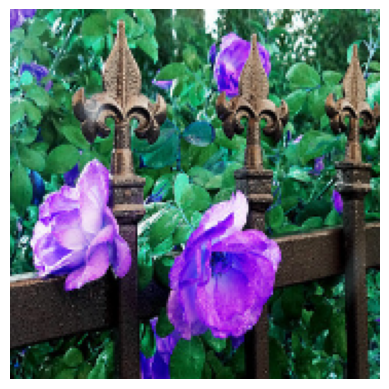

In [49]:
plt.axis('off')
plt.imshow(x[0])
plt.show()

# Data Augmentation

**For Zooming**

In [50]:
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.7),
])

In [51]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[188.49368  , 175.97974  , 227.90056  ],
        [171.31079  , 148.28717  , 226.88771  ],
        [130.75845  ,  88.658966 , 209.04842  ],
        ...,
        [109.23368  , 153.01282  , 121.86245  ],
        [ 34.24538  , 109.186554 ,  71.61117  ],
        [ 51.472874 , 126.32076  ,  87.24621  ]],

       [[201.36884  , 179.69217  , 241.65088  ],
        [179.15028  , 151.68373  , 229.52675  ],
        [117.789764 ,  68.20748  , 206.43872  ],
        ...,
        [122.816444 , 162.05315  , 132.8169   ],
        [ 47.401558 , 123.219055 ,  82.68088  ],
        [ 46.816513 , 118.113235 ,  74.297386 ]],

       [[202.52255  , 182.37012  , 235.9682   ],
        [167.29335  , 137.53722  , 223.12506  ],
        [109.40199  ,  64.203545 , 200.16574  ],
        ...,
        [ 54.76938  , 109.7654   ,  75.986084 ],
        [ 14.533344 ,  73.32272  ,  37.134308 ],
        [ 15.772553 ,  83.12164  ,  51.507385 ]],

       ...,

     

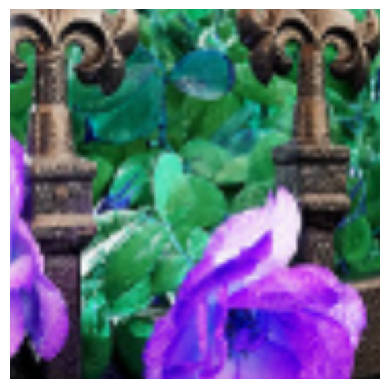

In [52]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))
plt.show()

**For Contrasting**

In [53]:
data_aug1 = tf.keras.Sequential([
    layers.RandomContrast(0.9)
])

In [54]:
data_aug1(x[1])

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 37.083008,  64.580185,  70.115456],
        [ 41.421757,  68.19581 ,  74.45421 ],
        [ 37.80613 ,  64.580185,  70.83858 ],
        ...,
        [ 59.499886, 100.01332 , 101.20984 ],
        [ 52.268635,  92.78207 ,  89.63983 ],
        [ 58.77676 ,  97.84395 ,  91.80921 ]],

       [[ 42.868008,  68.91893 ,  74.45421 ],
        [ 40.69863 ,  66.74956 ,  72.28483 ],
        [ 37.083008,  62.41081 ,  67.946075],
        ...,
        [ 73.239265, 115.92207 , 117.84172 ],
        [ 51.54551 ,  93.505196,  92.53233 ],
        [ 60.946136, 100.73644 ,  96.871086]],

       [[ 41.421757,  66.026436,  69.392334],
        [ 39.25238 ,  63.85706 ,  67.22295 ],
        [ 38.529255,  63.133934,  66.49983 ],
        ...,
        [ 55.884262,  96.39769 , 100.48671 ],
        [ 46.483635,  86.27394 ,  89.63983 ],
        [ 66.73114 , 104.35207 , 104.10234 ]],

       ...,

       [[ 48.653008,  76.15019 ,  86.02421 ],
        [ 60.

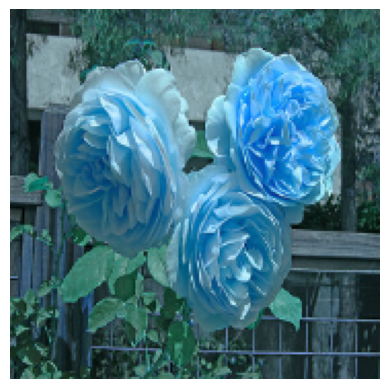

In [55]:
plt.axis('off')
plt.imshow(x[1])
plt.show()

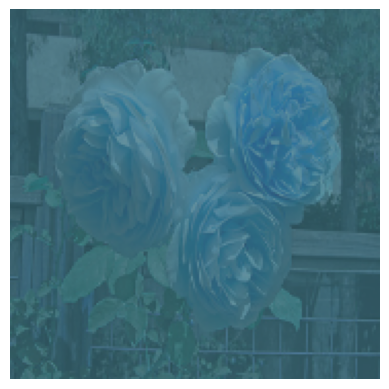

In [56]:
plt.axis('off')
plt.imshow(data_aug1(x[1]).numpy().astype('uint8'))
plt.show()

**For Rotation**

In [57]:
data_aug2 = tf.keras.Sequential([
    layers.RandomRotation(0.3)
])

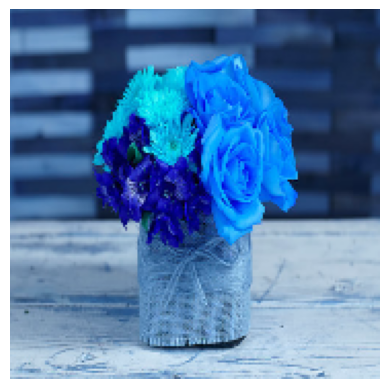

In [58]:
plt.axis('off')
plt.imshow(x[10])
plt.show()

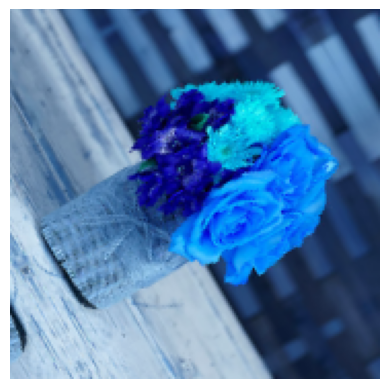

In [59]:
plt.axis('off')
plt.imshow(data_aug2(x[10]).numpy().astype('uint8'))
plt.show()

In [60]:
img_height=180
img_width=180

In [61]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal',
                     input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


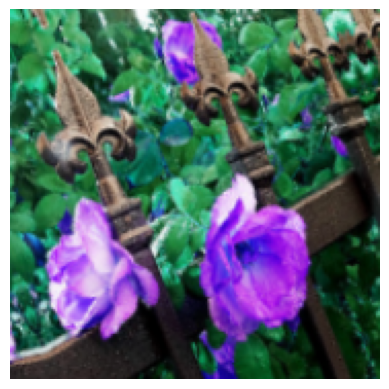

In [62]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))
plt.show()

In [75]:
num_classes = 5
cnn = Sequential([
    data_augmentation,
    layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(500, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes)
])

cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

cnn.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.3523 - loss: 1.5710
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5572 - loss: 1.0610
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6185 - loss: 0.9342
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6520 - loss: 0.8788
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6858 - loss: 0.8129
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7150 - loss: 0.7523
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7198 - loss: 0.7217
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7324 - loss: 0.6992
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7424 - loss: 0.6673
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7654 - loss: 0.6118
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7726 - loss: 0.5921
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy:

In [76]:
cnn.evaluate(x_test_scaled, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7022 - loss: 1.1636


[1.042230486869812, 0.7138964533805847]

In [77]:
predictions = cnn.predict(x_test_scaled)
predictions

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[ 5.0067096 , -2.5072973 , -8.317507  , -8.884925  ,  4.2703505 ],
       [-6.5459275 , -0.2782426 ,  2.080851  ,  5.09416   , -7.4262667 ],
       [-1.035794  ,  2.0926337 ,  0.12880096, -7.0466456 ,  2.0667014 ],
       ...,
       [-6.361381  ,  6.918728  , -7.226009  , -4.4141593 , -5.200595  ],
       [ 0.3892567 , -3.4010434 , -1.8040371 , -0.95158345,  1.1028259 ],
       [-4.1054745 , -4.6387424 ,  4.3563805 ,  1.6055248 , -3.6495378 ]],
      dtype=float32)

In [78]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.7594874e-01, 3.6865674e-04, 1.1047905e-06, 6.2640294e-07,
       3.2368091e-01], dtype=float32)>

In [79]:
np.argmax(score)

0

In [80]:
y_test[0]

0

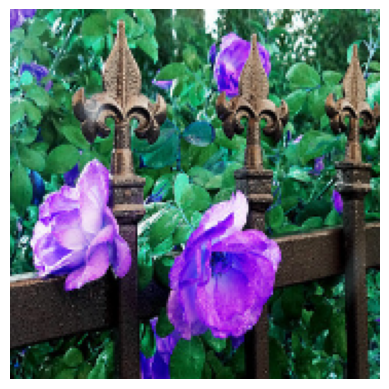

In [81]:
plt.axis('off')
plt.imshow(x[np.argmax(score)])
plt.show()

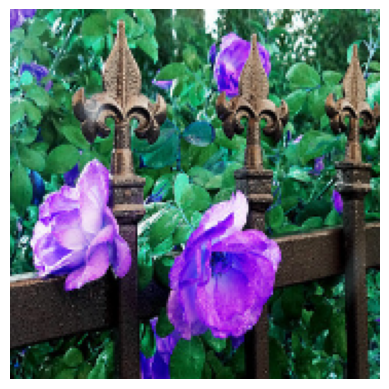

In [82]:
plt.axis('off')
plt.imshow(x[0])
plt.show()

In [86]:
y_predict_labels = [np.argmax(i) for i in predictions] 
y_predict_labels[:5]

[0, 3, 1, 1, 1]

In [87]:
y_test[0]

0

In [88]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels) 
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 91,  10,   8,   6,  35],
       [  2,  97,  12,   8,   7],
       [  3,  14, 112,  31,  12],
       [  4,   3,   1, 116,   5],
       [ 23,   9,   3,  14, 108]], dtype=int32)>

In [90]:
import seaborn as sns

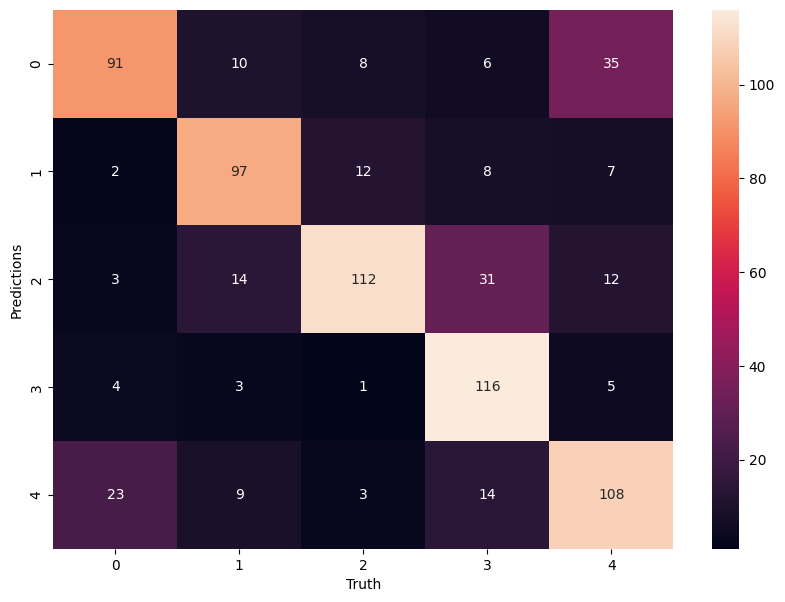

In [91]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('Truth') 
plt.ylabel('Predictions') 
plt.show()

In [92]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [94]:
print("Classification report: \n", classification_report(y_test, y_predict_labels))

Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.61      0.67       150
           1       0.73      0.77      0.75       126
           2       0.82      0.65      0.73       172
           3       0.66      0.90      0.76       129
           4       0.65      0.69      0.67       157

    accuracy                           0.71       734
   macro avg       0.72      0.72      0.71       734
weighted avg       0.72      0.71      0.71       734



In [96]:
precision_score(y_test, y_predict_labels, average='weighted')

0.724194701610409

In [97]:
recall_score(y_test, y_predict_labels, average='weighted')

0.7138964577656676

In [98]:
f1_score(y_test, y_predict_labels, average='weighted')

0.7119663795054587